### AWS Îã§Ïù¥Ïñ¥Í∑∏Îû® Í∞ùÏ≤¥ ÌÉêÏßÄ Ïã§Ìóò

- ÏûëÏÑ±ÏùºÏûê: 2025-08-07
- ÏûëÏÑ±Ïûê: Ïö∞ÏÑ±ÎØº <sungminwoo.devops@gmail.com>

#### ÏÑ§Ï†ï

In [36]:
%matplotlib inline

In [37]:
# ÌôòÍ≤ΩÎ≥ÄÏàò ÏÑ§Ï†ï
import os
from dotenv import load_dotenv
load_dotenv()
ROBOFLOW_API_KEY = os.getenv('ROBOFLOW_API_KEY', "GmmcPzjqUM0s4fqtIu1V")

In [ ]:
# ÌëúÏ§Ä ÎùºÏù¥Î∏åÎü¨Î¶¨
import gc
import json
import shutil
from datetime import datetime
from io import BytesIO
from pathlib import Path
from typing import Dict, List, Tuple
from collections import Counter
from glob import glob

# Ïô∏Î∂Ä ÎùºÏù¥Î∏åÎü¨Î¶¨ - Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Î∞è ÏãúÍ∞ÅÌôî
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Ïô∏Î∂Ä ÎùºÏù¥Î∏åÎü¨Î¶¨ - Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Î∞è Ï¶ùÍ∞ï
import cv2
import albumentations as A

# Ïô∏Î∂Ä ÎùºÏù¥Î∏åÎü¨Î¶¨ - Îî•Îü¨Îãù Î∞è Î™®Îç∏
import tensorflow as tf
from ultralytics import YOLO

# Ïô∏Î∂Ä ÎùºÏù¥Î∏åÎü¨Î¶¨ - Í∏∞ÌÉÄ Ïú†Ìã∏
import requests
import yaml
from roboflow import Roboflow

# Ïô∏Î∂Ä ÎùºÏù¥Î∏åÎü¨Î¶¨ - Î™®Îç∏ ÌïôÏäµ Ïú†Ìã∏
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [39]:
# ÌòÑÏû¨ ÌîÑÎ°úÏ†ùÌä∏ ÎîîÎ†âÌÑ∞Î¶¨ ÌôïÏù∏
print(os.getcwd())

/home/smallpod/workspace/hit_aws_object_detection


In [40]:
# GPU ÏÑ§Ï†ï
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    tf.config.set_visible_devices(tf.config.list_physical_devices('CPU')[0], 'CPU')

### EDA

In [41]:
# # Roboflow Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú
# rf = Roboflow(api_key=ROBOFLOW_API_KEY)
# project = rf.workspace("aws-icons").project("aws-icon-detector")
# version = project.version(4)
# dataset = version.download("yolov8")

In [ ]:
# 1. Preprocessing: Resize: Stretch to 640x640
# 2. Augmentations
#       Outputs per training example: 3
#       Crop: 0% Minimum Zoom, 20% Maximum Zoom
#       Shear: ¬±10¬∞ Horizontal, ¬±10¬∞ Vertical
#       Saturation: Between -25% and +25%
#       Brightness: Between -15% and +15%
#       Exposure: Between -10% and +10%
#       Blur: Up to 2.5px
#       Noise: Up to 0.1% of pixels
# TODOS: ÎùºÎ≤® ÌíàÏßà Í≤ÄÌÜ† ÌïÑÏöî (Roboflow, CVAT)
# TODOS: ÏûëÏùÄ Í∞ùÏ≤¥ ÎåÄÏùëÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï Í∏∞Î≤ï ÎèÑÏûÖ: mosaic, cutmix, copy-paste 
from roboflow import Roboflow

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("test-iw15m").project("aws-icon-detector-d3gb3")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [43]:
# ÎùºÎ≤® Í≤ΩÎ°ú
label_dir = "AWS-Icon-Detector--1/train/labels"
label_files = glob("AWS-Icon-Detector--1/train/labels/*.txt")
labels = glob(f"{label_dir}/*.txt")
class_counts = Counter()


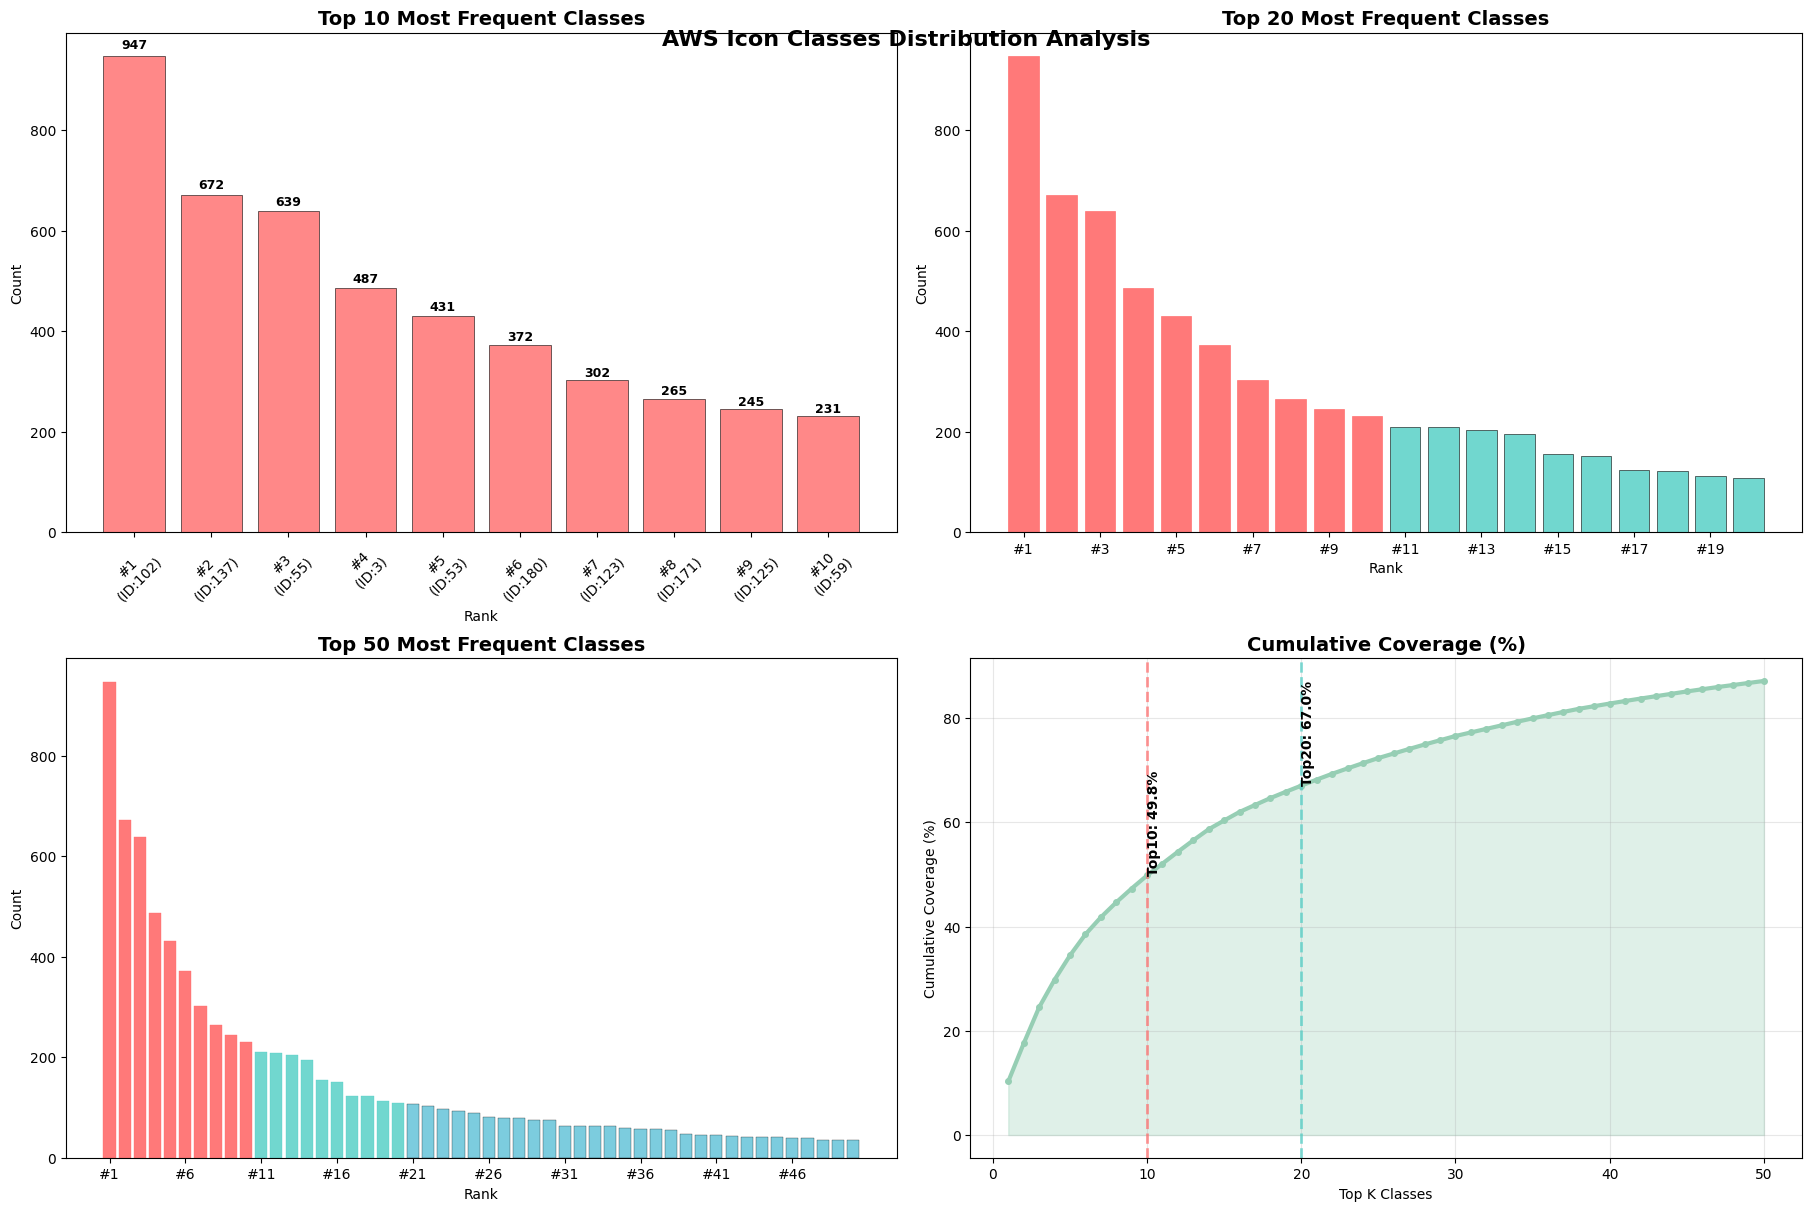

üìä Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÏöîÏïΩ:
   ‚Ä¢ Ï†ÑÏ≤¥ ÌÅ¥ÎûòÏä§ Ïàò: 182
   ‚Ä¢ Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò: 9,219
   ‚Ä¢ Top 10 Ïª§Î≤ÑÎ¶¨ÏßÄ: 49.8%
   ‚Ä¢ Top 20 Ïª§Î≤ÑÎ¶¨ÏßÄ: 67.0%
   ‚Ä¢ Top 50 Ïª§Î≤ÑÎ¶¨ÏßÄ: 87.1%


<Figure size 640x480 with 0 Axes>

In [ ]:
# ÌÅ¥ÎûòÏä§Î≥Ñ Í∞úÏàò ÏßëÍ≥Ñ
for path in labels:
    with open(path) as f:
        for line in f:
            class_id = int(line.strip().split()[0])
            class_counts[class_id] += 1

# Ï†ÑÏ≤¥ ÌÅ¥ÎûòÏä§ Ïàò (0Î∂ÄÌÑ∞ ÏãúÏûëÌïúÎã§Í≥† Í∞ÄÏ†ï)
num_classes = max(class_counts.keys()) + 1
counts = [class_counts.get(i, 0) for i in range(num_classes)]

# ÌÅ¥ÎûòÏä§ Ï†ïÎ†¨ Ìï®Ïàò
def get_sorted_counts(top_k=None):
    sorted_items = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
    if top_k:
        sorted_items = sorted_items[:top_k]
    class_ids, values = zip(*sorted_items)
    return class_ids, values

# Ï†ïÎ†¨Îêú Ï†ÑÏ≤¥ Î∂ÑÌè¨
sorted_ids_all, sorted_vals_all = get_sorted_counts()

# Top-K
top10_ids, top10_vals = get_sorted_counts(10)
top20_ids, top20_vals = get_sorted_counts(20)
top50_ids, top50_vals = get_sorted_counts(50)


# 1. ÏÑúÎ∏åÌîåÎ°ØÏúºÎ°ú Top10/20/50 ÎπÑÍµê
fig, axs = plt.subplots(2, 2, figsize=(18, 12), constrained_layout=True)

# Top 10 (ÏôºÏ™Ω ÏÉÅÎã®)
bars1 = axs[0, 0].bar(range(len(top10_ids)), top10_vals, color='#FF6B6B', alpha=0.8, edgecolor='black', linewidth=0.5)
axs[0, 0].set_title("Top 10 Most Frequent Classes", fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel("Rank")
axs[0, 0].set_ylabel("Count")
axs[0, 0].set_xticks(range(len(top10_ids)))
axs[0, 0].set_xticklabels([f"#{i+1}\n(ID:{cls_id})" for i, cls_id in enumerate(top10_ids)], rotation=45)
# Í∞í ÌëúÏãú
for i, (bar, val) in enumerate(zip(bars1, top10_vals)):
    axs[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + val*0.01, 
                   str(val), ha='center', va='bottom', fontweight='bold', fontsize=9)

# Top 20 (Ïò§Î•∏Ï™Ω ÏÉÅÎã®)
bars2 = axs[0, 1].bar(range(len(top20_ids)), top20_vals, color='#4ECDC4', alpha=0.8, edgecolor='black', linewidth=0.5)
axs[0, 1].set_title("Top 20 Most Frequent Classes", fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel("Rank")
axs[0, 1].set_ylabel("Count")
axs[0, 1].set_xticks(range(0, len(top20_ids), 2))  # 2Í∞úÏî© Í±¥ÎÑàÎõ∞Ïñ¥ ÌëúÏãú
axs[0, 1].set_xticklabels([f"#{i+1}" for i in range(0, len(top20_ids), 2)])
# Top 10ÏùÄ Îπ®Í∞ÑÏÉâÏúºÎ°ú Í∞ïÏ°∞
for i, bar in enumerate(bars2):
    if i < 10:
        bar.set_color('#FF6B6B')
        bar.set_alpha(0.9)

# Top 50 (ÏôºÏ™Ω ÌïòÎã®)
bars3 = axs[1, 0].bar(range(len(top50_ids)), top50_vals, color='#45B7D1', alpha=0.7, edgecolor='black', linewidth=0.3)
axs[1, 0].set_title("Top 50 Most Frequent Classes", fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel("Rank")
axs[1, 0].set_ylabel("Count")
axs[1, 0].set_xticks(range(0, len(top50_ids), 5))  # 5Í∞úÏî© Í±¥ÎÑàÎõ∞Ïñ¥ ÌëúÏãú
axs[1, 0].set_xticklabels([f"#{i+1}" for i in range(0, len(top50_ids), 5)])
# Top 10, 20 Íµ¨Í∞ÑÎ≥Ñ ÏÉâÏÉÅ Íµ¨Î∂Ñ
for i, bar in enumerate(bars3):
    if i < 10:
        bar.set_color('#FF6B6B')  # Top 10
        bar.set_alpha(0.9)
    elif i < 20:
        bar.set_color('#4ECDC4')  # Top 11-20
        bar.set_alpha(0.8)

# ÎàÑÏ†Å ÎπÑÏú® (Ïò§Î•∏Ï™Ω ÌïòÎã®)
cumulative_counts = np.cumsum(top50_vals)
total_count = sum(class_counts.values())
cumulative_ratio = (cumulative_counts / total_count) * 100

axs[1, 1].plot(range(1, len(top50_ids)+1), cumulative_ratio, marker='o', linewidth=3, markersize=4, color='#96CEB4')
axs[1, 1].fill_between(range(1, len(top50_ids)+1), cumulative_ratio, alpha=0.3, color='#96CEB4')
axs[1, 1].set_title("Cumulative Coverage (%)", fontsize=14, fontweight='bold')
axs[1, 1].set_xlabel("Top K Classes")
axs[1, 1].set_ylabel("Cumulative Coverage (%)")
axs[1, 1].grid(True, alpha=0.3)

# Ï§ëÏöîÌïú ÏßÄÏ†ê ÌëúÏãú
axs[1, 1].axvline(x=10, color='#FF6B6B', linestyle='--', alpha=0.7, linewidth=2)
axs[1, 1].axvline(x=20, color='#4ECDC4', linestyle='--', alpha=0.7, linewidth=2)
axs[1, 1].text(10, cumulative_ratio[9], f'Top10: {cumulative_ratio[9]:.1f}%', 
               rotation=90, verticalalignment='bottom', fontweight='bold')
axs[1, 1].text(20, cumulative_ratio[19], f'Top20: {cumulative_ratio[19]:.1f}%', 
               rotation=90, verticalalignment='bottom', fontweight='bold')

plt.suptitle('AWS Icon Classes Distribution Analysis', fontsize=16, fontweight='bold', y=0.98)
plt.show()

print(f"üìä Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÏöîÏïΩ:")
print(f"   ‚Ä¢ Ï†ÑÏ≤¥ ÌÅ¥ÎûòÏä§ Ïàò: {num_classes}")
print(f"   ‚Ä¢ Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò: {total_count:,}")
print(f"   ‚Ä¢ Top 10 Ïª§Î≤ÑÎ¶¨ÏßÄ: {cumulative_ratio[9]:.1f}%")
print(f"   ‚Ä¢ Top 20 Ïª§Î≤ÑÎ¶¨ÏßÄ: {cumulative_ratio[19]:.1f}%")
print(f"   ‚Ä¢ Top 50 Ïª§Î≤ÑÎ¶¨ÏßÄ: {cumulative_ratio[49]:.1f}%")


plt.savefig('./output/class_distribution.png')

In [ ]:
# ÌÅ¥ÎûòÏä§Î≥Ñ Îì±Ïû• ÌöüÏàò ÏßëÍ≥Ñ
class_counts = Counter()
for file in label_files:
    with open(file) as f:
        for line in f:
            class_id = int(line.strip().split()[0])
            class_counts[class_id] += 1

# Ï†ÑÏ≤¥ Îì±Ïû• ÌöüÏàò
total_count = sum(class_counts.values())

# ÌÅ¥ÎûòÏä§ Îì±Ïû• ÏàúÏúºÎ°ú Ï†ïÎ†¨
sorted_items = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)

# Top 10 / 20 / 50 Ï∂îÏ∂ú
top10 = sorted_items[:10]
top20 = sorted_items[:20]
top50 = sorted_items[:50]

# Î∂ÑÎ¶¨
top10_ids, top10_vals = zip(*top10)
top20_ids, top20_vals = zip(*top20)
top50_ids, top50_vals = zip(*top50)

In [47]:
import yaml
from pprint import pprint

with open("AWS-Icon-Detector--1/data.yaml", 'r') as f:
    data = yaml.safe_load(f)
    class_names = data['names']

# Îì±Ïû•ÌïòÏßÄ ÏïäÏùÄ ÌÅ¥ÎûòÏä§
unseen_classes = [i for i in range(num_classes) if i not in class_counts]
unseen_class_names = [class_names[i] for i in unseen_classes]
pprint(f"üìä Îì±Ïû•ÌïòÏßÄ ÏïäÏùÄ ÌÅ¥ÎûòÏä§: {unseen_class_names}")


("üìä Îì±Ïû•ÌïòÏßÄ ÏïäÏùÄ ÌÅ¥ÎûòÏä§: ['Detective', 'Distribution', 'EMR', 'Elemental "
 "MediaPackage', 'Firewall Manager', 'Flow logs', 'Glacier', 'Inspector "
 "Agent', 'Network Firewall', 'SSM Agent', 'Sign-On', 'Snowball', 'Storage "
 "Gateway']")


In [48]:
# 1. Í≥ÑÎã®Ïãù(Waterfall) Ïä§ÌÉÄÏùº ÎπÑÍµê Ï∞®Ìä∏
fig_combined = go.Figure()

# Î∞∞Í≤Ω (Top 50)
fig_combined.add_trace(go.Bar(
    x=list(range(1, 51)),
    y=top50_vals,
    name='Top 50 (Ï†ÑÏ≤¥)',
    marker_color='lightgray',
    opacity=0.4,
    hovertemplate='<b>Rank %{x}</b><br>Class ID: %{customdata}<br>Count: %{y}<extra></extra>',
    customdata=top50_ids
))

# Ï§ëÍ∞ÑÏ∏µ (Top 20)
fig_combined.add_trace(go.Bar(
    x=list(range(1, 21)),
    y=top20_vals,
    name='Top 20',
    marker_color='lightcoral',
    opacity=0.7,
    hovertemplate='<b>Rank %{x}</b><br>Class ID: %{customdata}<br>Count: %{y}<extra></extra>',
    customdata=top20_ids
))

# ÏµúÏÉÅÏúÑ (Top 10)
fig_combined.add_trace(go.Bar(
    x=list(range(1, 11)),
    y=top10_vals,
    name='Top 10',
    marker_color='darkred',
    opacity=0.9,
    hovertemplate='<b>Rank %{x}</b><br>Class ID: %{customdata}<br>Count: %{y}<br><b>Top 10!</b><extra></extra>',
    customdata=top10_ids
))

# Íµ¨Î∂ÑÏÑ† Ï∂îÍ∞Ä
fig_combined.add_vline(x=10.5, line_dash="dash", line_color="red", 
                      annotation_text="Top 10", annotation_position="top")
fig_combined.add_vline(x=20.5, line_dash="dash", line_color="orange", 
                      annotation_text="Top 20", annotation_position="top")

fig_combined.update_layout(
    title='üéØ Top 10/20/50 Classes ÌÜµÌï© ÎπÑÍµê',
    xaxis_title='Rank (ÌÅ¥ÎûòÏä§ ÏàúÏúÑ)',
    yaxis_title='Count (ÏÉòÌîå Ïàò)',
    barmode='overlay',  # Ïò§Î≤ÑÎ†àÏù¥ Î™®ÎìúÎ°ú Í≤πÏπòÍ∏∞
    height=500,
    width=1000,
    showlegend=True,
    hovermode='x unified'
)

fig_combined.show()

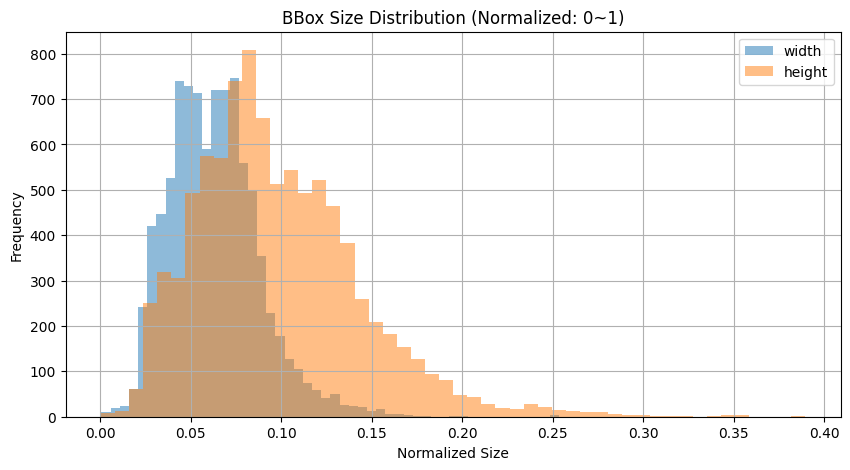

In [49]:
# 2. width, height Í∞í Ï∂îÏ∂ú
bbox_wh = []

for file in label_files:
    with open(file) as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 5:  # class_id, x_center, y_center, width, height
                _, _, _, w, h = map(float, parts)
                bbox_wh.append((w, h))

# 3. Î∂ÑÎ¶¨ Î∞è ÏãúÍ∞ÅÌôî
if bbox_wh:
    w_vals, h_vals = zip(*bbox_wh)

    plt.figure(figsize=(10, 5))
    plt.hist(w_vals, bins=50, alpha=0.5, label='width')
    plt.hist(h_vals, bins=50, alpha=0.5, label='height')
    plt.xlabel("Normalized Size")
    plt.ylabel("Frequency")
    plt.legend()
    plt.title("BBox Size Distribution (Normalized: 0~1)")
    plt.grid(True)
    plt.show()
else:
    print("No bounding boxes found.")


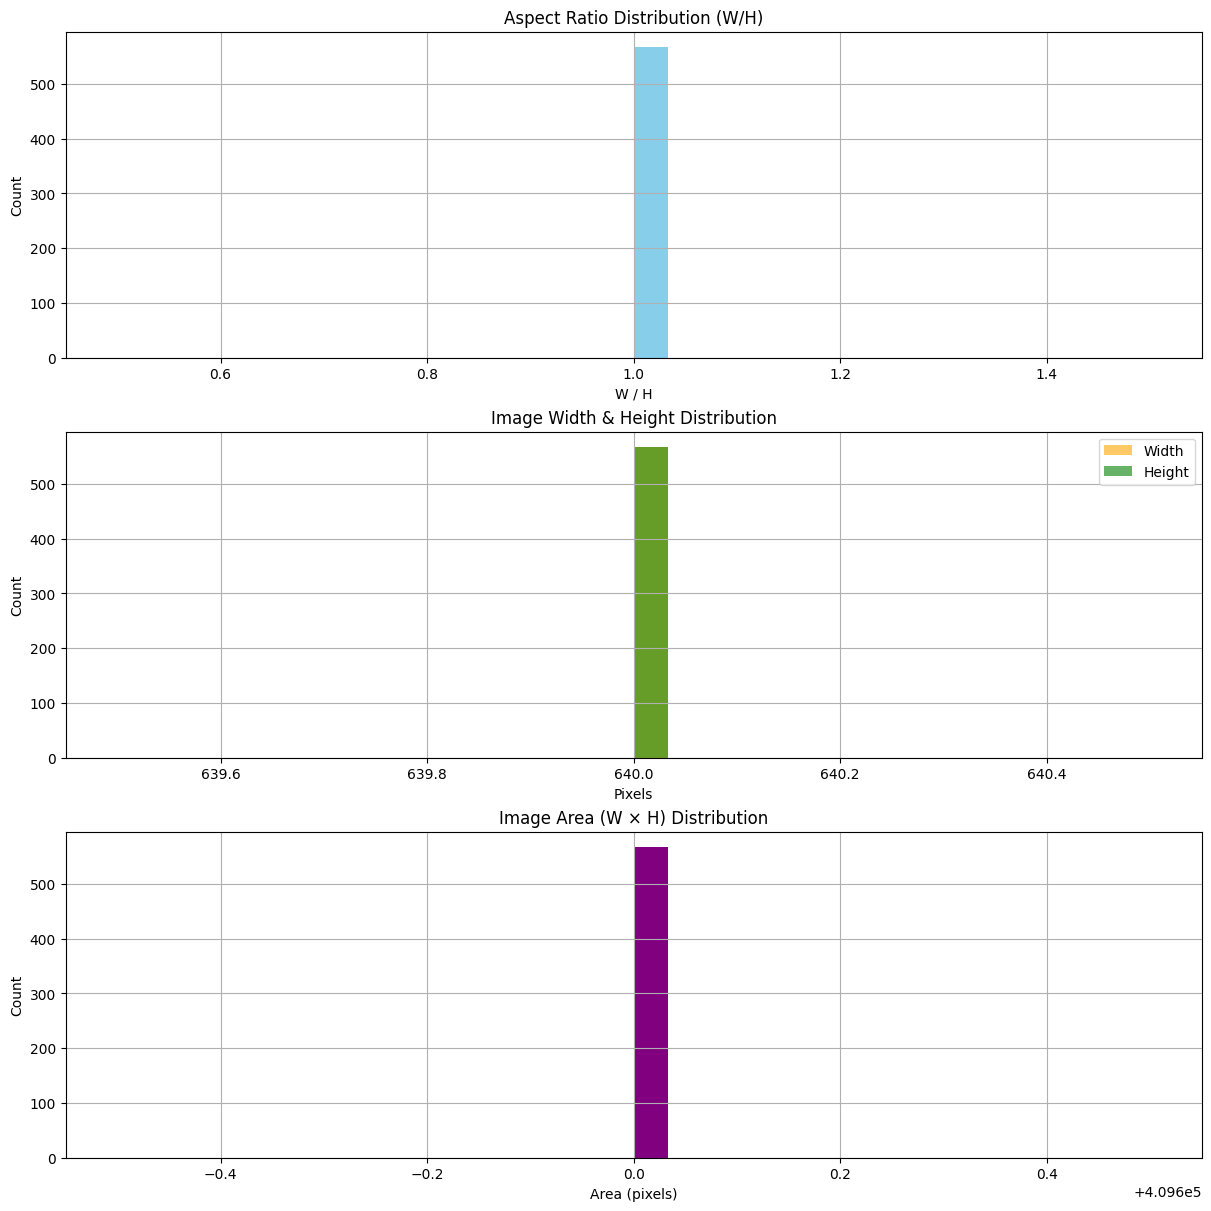

In [ ]:
# Ïù¥ÎØ∏ÏßÄ Ìï¥ÏÉÅÎèÑ Î∞è Ï¢ÖÌö°ÎπÑ Î∂ÑÏÑù

# Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú ÏÑ§Ï†ï
image_dir = "AWS-Icon-Detector--1/train/images"
image_files = glob(f"{image_dir}/*.jpg") + glob(f"{image_dir}/*.png")

# Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ ÏàòÏßë
shapes = []

for path in image_files:
    img = cv2.imread(path)
    if img is not None:
        h, w = img.shape[:2]
        shapes.append((w, h))

# Î∂ÑÏÑù
if shapes:
    widths, heights = zip(*shapes)
    aspect_ratios = [w/h for w, h in shapes]
    areas = [w * h for w, h in shapes]

    fig, axs = plt.subplots(3, 1, figsize=(12, 12), constrained_layout=True)

    # 1. Aspect Ratio (W/H)
    axs[0].hist(aspect_ratios, bins=30, color='skyblue')
    axs[0].set_title("Aspect Ratio Distribution (W/H)")
    axs[0].set_xlabel("W / H")
    axs[0].set_ylabel("Count")
    axs[0].grid(True)

    # 2. Width & Height Î∂ÑÌè¨
    axs[1].hist(widths, bins=30, alpha=0.6, label='Width', color='orange')
    axs[1].hist(heights, bins=30, alpha=0.6, label='Height', color='green')
    axs[1].set_title("Image Width & Height Distribution")
    axs[1].set_xlabel("Pixels")
    axs[1].set_ylabel("Count")
    axs[1].legend()
    axs[1].grid(True)

    # 3. Image Area Î∂ÑÌè¨
    axs[2].hist(areas, bins=30, color='purple')
    axs[2].set_title("Image Area (W √ó H) Distribution")
    axs[2].set_xlabel("Area (pixels)")
    axs[2].set_ylabel("Count")
    axs[2].grid(True)

    plt.show()

else:
    print("No image files found or unreadable.")

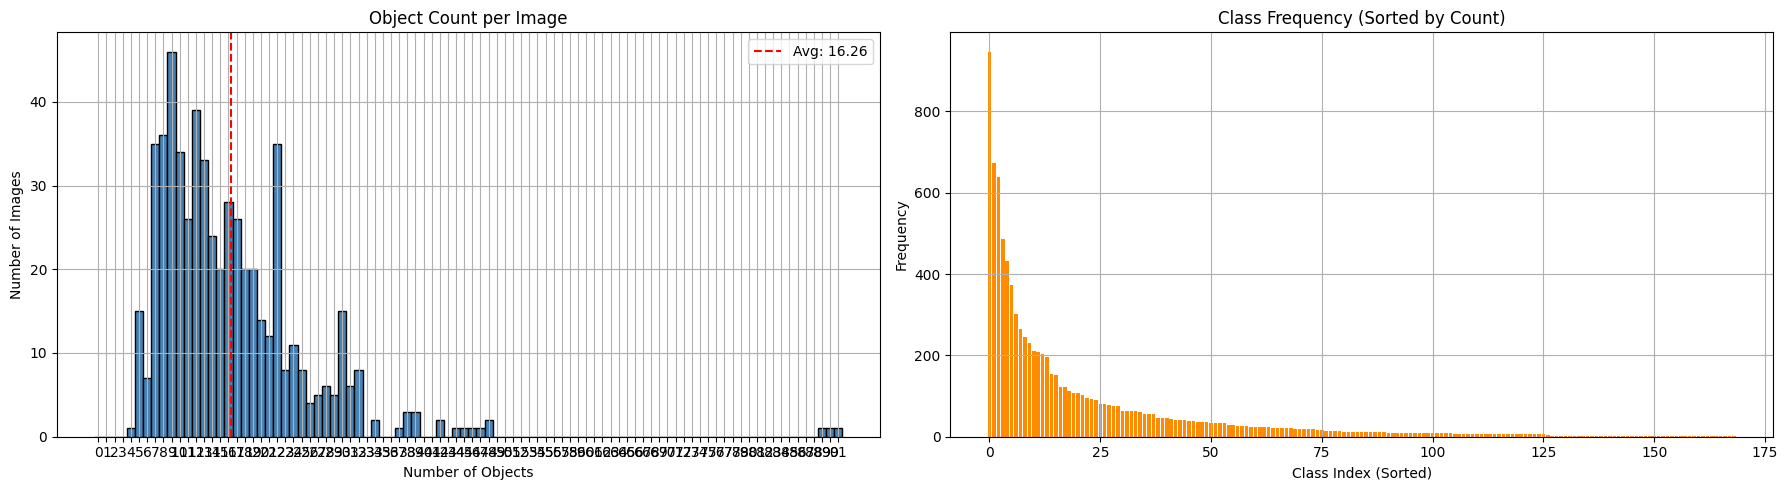

In [51]:
# === [1] Ïù¥ÎØ∏ÏßÄÎãπ Í∞ùÏ≤¥ Ïàò Î∂ÑÌè¨ ===
label_dir = "AWS-Icon-Detector--1/train/labels"
label_files = glob(f"{label_dir}/*.txt")
obj_per_img = [len(open(f).readlines()) for f in label_files]

min_val = min(obj_per_img)
max_val = max(obj_per_img)
avg_val = sum(obj_per_img) / len(obj_per_img)

# === [2] ÌÅ¥ÎûòÏä§Î≥Ñ Îì±Ïû• ÌöüÏàò ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨ ===
class_counts = Counter()
for file in label_files:
    with open(file) as f:
        for line in f:
            class_id = int(line.strip().split()[0])
            class_counts[class_id] += 1

sorted_classes = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
class_ids, class_freqs = zip(*sorted_classes)

# === ÏãúÍ∞ÅÌôî (subplot 1Ìñâ 2Ïó¥) ===
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

# [Ï¢åÏ∏°] Ïù¥ÎØ∏ÏßÄÎãπ Í∞ùÏ≤¥ Ïàò Î∂ÑÌè¨
axs[0].hist(obj_per_img, bins=range(0, max_val + 2), color='steelblue', edgecolor='black', align='left')
axs[0].axvline(avg_val, color='red', linestyle='--', label=f'Avg: {avg_val:.2f}')
axs[0].set_title("Object Count per Image")
axs[0].set_xlabel("Number of Objects")
axs[0].set_ylabel("Number of Images")
axs[0].grid(True)
axs[0].legend()
axs[0].set_xticks(range(0, max_val + 1))

# [Ïö∞Ï∏°] ÌÅ¥ÎûòÏä§Î≥Ñ Îì±Ïû• ÎπàÎèÑ ÎÇ¥Î¶ºÏ∞®Ïàú
axs[1].bar(range(len(class_ids)), class_freqs, color='darkorange')
axs[1].set_title("Class Frequency (Sorted by Count)")
axs[1].set_xlabel("Class Index (Sorted)")
axs[1].set_ylabel("Frequency")
axs[1].grid(True)

plt.tight_layout()
plt.show()


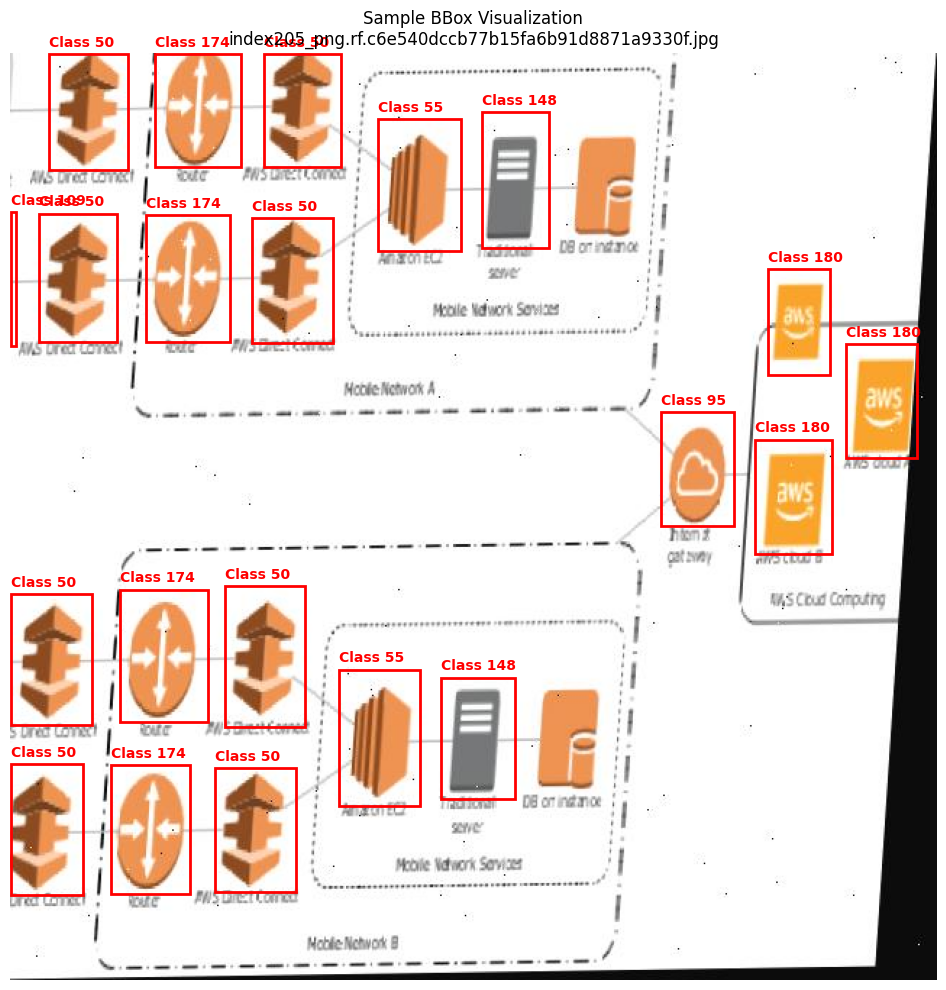

In [52]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from glob import glob
import random
import os

# === Í≤ΩÎ°ú ÏÑ§Ï†ï ===
image_dir = "AWS-Icon-Detector--1/train/images"
label_dir = "AWS-Icon-Detector--1/train/labels"

# === ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ ÏûêÎèô ÏÑ†ÌÉù ===
image_files = glob(f"{image_dir}/*.jpg") + glob(f"{image_dir}/*.png")
sample_image_path = random.choice(image_files)
sample_label_path = os.path.join(label_dir, os.path.basename(sample_image_path).replace('.jpg', '.txt').replace('.png', '.txt'))

# === Ïù¥ÎØ∏ÏßÄ Î°úÎìú ===
img = cv2.imread(sample_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w = img.shape[:2]

# === ÏãúÍ∞ÅÌôî ===
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(img)
ax.set_title(f"Sample BBox Visualization\n{os.path.basename(sample_image_path)}")

with open(sample_label_path) as f:
    for line in f:
        parts = list(map(float, line.strip().split()))
        if len(parts) >= 5:
            cls, xc, yc, bw, bh = parts[:5]
            x = (xc - bw / 2) * w
            y = (yc - bh / 2) * h
            bw *= w
            bh *= h
            rect = patches.Rectangle((x, y), bw, bh, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            ax.text(x, y - 5, f"Class {int(cls)}", color='red', fontsize=10, weight='bold')

plt.axis("off")
plt.tight_layout()
plt.show()


### Î™®Îç∏ ÌõàÎ†® (YOLOv8)

1. YOLOv5 - Í∞ôÏùÄ Í≥ÑÏó¥, ÏßÅÏ†ëÏ†ÅÏù∏ Ïù¥Ï†Ñ ÏÑ∏ÎåÄ (mAP@50, mAP@50-95, ÏûëÏùÄ ÏïÑÏù¥ÏΩò Í∞ùÏ≤¥ ÏÑ±Îä•)
pip install yolo5

2. YOLO-NAS (SuperGradients) - YOLOv8Î≥¥Îã§ Ìñ•ÏÉÅÎêú ÏÑ±Îä•ÏùÑ Î≥¥Ïó¨Ï£ºÎäî ÏµúÏã† YOLO Í≥ÑÏó¥ (mAP ÎÜíÍ≥† Ï∂îÎ°† ÏÜçÎèÑ Îπ†Î¶Ñ, ÏâΩÍ≤å ÌÜµÌï© Í∞ÄÎä•)
pip install super-gradients
from super_gradients.training import models
model = models.get('yolo_nas_s', pretrained=True)

3. EfficientDet-D1


#### YOLOv8n ÌõàÎ†®

In [54]:
model_results = {}

In [2]:
# YOLOv8n Î™®Îç∏ ÌõàÎ†®
model_name = 'yolov8n.pt'
model = YOLO(model_name)

result = model.train(
    project='/home/smallpod/workspace/hit_aws_object_detection/runs',
    name=model_name.replace('.pt', ''),
    data='/home/smallpod/workspace/hit_aws_object_detection/AWS-Icon-Detector--4/data.yaml',
    workers=4,
    cache='disk',
    epochs=10,          # 50 ~ 100
    patience=10,        # Ï†ÅÏ†à
    imgsz=640,          # ÏûëÏùÄ Í∞ùÏ≤¥ Ïù∏Ïãù Í∞úÏÑ†ÏùÑ ÏúÑÌï¥ 640 Ïù¥ÏÉÅ
    batch=16,            # Î©îÎ™®Î¶¨ Ï†úÌïú ÎïåÎ¨∏Ïóê ÎÇÆÏùÄ Î∞∞Ïπò ÏÇ¨Ïö©
    cos_lr=False,       # Í≥†Ï†ï ÌïôÏäµÎ•†
    optimizer='AdamW',  # SGDÎèÑ ÎπÑÍµê Í∞ÄÎä•. AdamWÍ∞Ä Ìï≠ÏÉÅ Ïö∞ÏúÑÎäî ÏïÑÎãò
    lr0=0.01,   # 0.01Ïù¥ Í≥ºÌïú ÌïôÏäµÎ•†Ïùº Ïàò ÏûàÏùå. 0.001 ~ 0.005
    lrf=0.1,
    weight_decay=0.0005,
    warmup_epochs=3.0,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    box=7.5,
    cls=0.5,
    dfl=1.5
)

NameError: name 'YOLO' is not defined

In [ ]:
# Í≤∞Í≥º ÎîîÎ†âÌÜ†Î¶¨
save_dir = result.save_dir
results_csv_path = save_dir / 'results.csv'

# CSV Î°úÎìú
df = pd.read_csv(results_csv_path)

# ÏãúÍ∞ÅÌôî Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
sns.set(style='whitegrid')
epochs = df.index + 1

# ÏÑ±Îä• ÏßÄÌëú ÏãúÍ∞ÅÌôî
fig, axs = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('YOLOv8 Training Metrics', fontsize=16)

# 1. Box loss
axs[0, 0].plot(epochs, df['train/box_loss'], label='train')
axs[0, 0].plot(epochs, df['val/box_loss'], label='val')
axs[0, 0].set_title('Box Loss')
axs[0, 0].legend()

# 2. Cls loss
axs[0, 1].plot(epochs, df['train/cls_loss'], label='train')
axs[0, 1].plot(epochs, df['val/cls_loss'], label='val')
axs[0, 1].set_title('Class Loss')
axs[0, 1].legend()

# 3. DFL loss
axs[0, 2].plot(epochs, df['train/dfl_loss'], label='train')
axs[0, 2].plot(epochs, df['val/dfl_loss'], label='val')
axs[0, 2].set_title('DFL Loss')
axs[0, 2].legend()

# 4. Precision
axs[1, 0].plot(epochs, df['metrics/precision(B)'])
axs[1, 0].set_title('Precision')

# 5. Recall
axs[1, 1].plot(epochs, df['metrics/recall(B)'])
axs[1, 1].set_title('Recall')

# 6. mAP@0.5
axs[1, 2].plot(epochs, df['metrics/mAP50(B)'])
axs[1, 2].set_title('mAP@0.5')

# 7. mAP@0.5:0.95
axs[2, 0].plot(epochs, df['metrics/mAP50-95(B)'])
axs[2, 0].set_title('mAP@0.5:0.95')

# 8. EpochÎ≥Ñ Ï†ïÎ¶¨
axs[2, 1].plot(epochs, df['lr/pg0'], label='pg0')
axs[2, 1].plot(epochs, df['lr/pg1'], label='pg1')
axs[2, 1].plot(epochs, df['lr/pg2'], label='pg2')
axs[2, 1].set_title('Learning Rate (per param group)')
axs[2, 1].legend()

# 9. Ï†ÑÏ≤¥ mAP Î∞è F1 ÏöîÏïΩ
axs[2, 2].plot(epochs, df['metrics/precision(B)'], label='Precision')
axs[2, 2].plot(epochs, df['metrics/recall(B)'], label='Recall')
axs[2, 2].plot(epochs, df['metrics/mAP50(B)'], label='mAP@0.5')
axs[2, 2].plot(epochs, df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
axs[2, 2].set_title('Summary')
axs[2, 2].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

In [ ]:
# ÏãúÍ∞ÅÌôî ÏÑ±Îä• Ï†ÄÏû•
map_val = result.box.map
if isinstance(map_val, (list, tuple)):
    map50 = map_val[0]
    map50_95 = map_val[1]
else:
    map50 = map_val
    map50_95 = None

model_results[model_name] = {
    'result': result,
    'mAP50': map50,
    'mAP50-95': map50_95,
}

best_model_path = result.save_dir / 'weights' / 'best.pt'
print(f"{model_name} saved to {best_model_path}")
print(f"mAP@0.5 = {map50:.4f}, mAP@0.5:0.95 = {map50_95:.4f}" if map50_95 else "")

#### YOLOv8s Î™®Îç∏ ÌõàÎ†®

In [ ]:
# YOLOv8s Î™®Îç∏ ÌõàÎ†®
model_name = 'yolov8s.pt'
model = YOLO(model_name)

result = model.train(
    project='/home/smallpod/workspace/hit_aws_object_detection/runs',
    name=model_name.replace('.pt', ''),
    data='/home/smallpod/workspace/hit_aws_object_detection/AWS-Icon-Detector--4/data.yaml',
    workers=4,
    cache='disk',
    epochs=10,
    imgsz=640,
    batch=8,
    patience=10,
    cos_lr=True,
    optimizer='AdamW',
    lr0=0.01,
    lrf=0.1,
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3.0,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    box=7.5,
    cls=0.5,
    dfl=1.5
)

# mAP Ï∂îÏ∂ú (Ïä§ÏπºÎùº/Î¶¨Ïä§Ìä∏ Ïó¨Î∂Ä ÌôïÏù∏)
map_val = result.box.map
if isinstance(map_val, (list, tuple)):
    map50 = map_val[0]
    map50_95 = map_val[1]
else:
    map50 = map_val
    map50_95 = None

# ÏÑ±Îä• Ï†ÄÏû•
model_results[model_name] = {
    'result': result,
    'mAP50': map50,
    'mAP50-95': map50_95,
}

# Ï†ÄÏû• Í≤ΩÎ°ú ÌôïÏù∏
best_model_path = result.save_dir / 'weights' / 'best.pt'
print(f"{model_name} saved to {best_model_path}")

In [ ]:
# Í≤∞Í≥º ÎîîÎ†âÌÜ†Î¶¨
save_dir = result.save_dir
results_csv_path = save_dir / 'results.csv'

# CSV Î°úÎìú
df = pd.read_csv(results_csv_path)

# ÏãúÍ∞ÅÌôî Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
sns.set(style='whitegrid')
epochs = df.index + 1

# ÏÑ±Îä• ÏßÄÌëú ÏãúÍ∞ÅÌôî
fig, axs = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('YOLOv8 Training Metrics', fontsize=16)

# 1. Box loss
axs[0, 0].plot(epochs, df['train/box_loss'], label='train')
axs[0, 0].plot(epochs, df['val/box_loss'], label='val')
axs[0, 0].set_title('Box Loss')
axs[0, 0].legend()

# 2. Cls loss
axs[0, 1].plot(epochs, df['train/cls_loss'], label='train')
axs[0, 1].plot(epochs, df['val/cls_loss'], label='val')
axs[0, 1].set_title('Class Loss')
axs[0, 1].legend()

# 3. DFL loss
axs[0, 2].plot(epochs, df['train/dfl_loss'], label='train')
axs[0, 2].plot(epochs, df['val/dfl_loss'], label='val')
axs[0, 2].set_title('DFL Loss')
axs[0, 2].legend()

# 4. Precision
axs[1, 0].plot(epochs, df['metrics/precision(B)'])
axs[1, 0].set_title('Precision')

# 5. Recall
axs[1, 1].plot(epochs, df['metrics/recall(B)'])
axs[1, 1].set_title('Recall')

# 6. mAP@0.5
axs[1, 2].plot(epochs, df['metrics/mAP50(B)'])
axs[1, 2].set_title('mAP@0.5')

# 7. mAP@0.5:0.95
axs[2, 0].plot(epochs, df['metrics/mAP50-95(B)'])
axs[2, 0].set_title('mAP@0.5:0.95')

# 8. EpochÎ≥Ñ Ï†ïÎ¶¨
axs[2, 1].plot(epochs, df['lr/pg0'], label='pg0')
axs[2, 1].plot(epochs, df['lr/pg1'], label='pg1')
axs[2, 1].plot(epochs, df['lr/pg2'], label='pg2')
axs[2, 1].set_title('Learning Rate (per param group)')
axs[2, 1].legend()

# 9. Ï†ÑÏ≤¥ mAP Î∞è F1 ÏöîÏïΩ
axs[2, 2].plot(epochs, df['metrics/precision(B)'], label='Precision')
axs[2, 2].plot(epochs, df['metrics/recall(B)'], label='Recall')
axs[2, 2].plot(epochs, df['metrics/mAP50(B)'], label='mAP@0.5')
axs[2, 2].plot(epochs, df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
axs[2, 2].set_title('Summary')
axs[2, 2].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

In [ ]:
# ÏãúÍ∞ÅÌôî ÏÑ±Îä• Ï†ÄÏû•
map_val = result.box.map
if isinstance(map_val, (list, tuple)):
    map50 = map_val[0]
    map50_95 = map_val[1]
else:
    map50 = map_val
    map50_95 = None

model_results[model_name] = {
    'result': result,
    'mAP50': map50,
    'mAP50-95': map50_95,
}

best_model_path = result.save_dir / 'weights' / 'best.pt'
print(f"{model_name} saved to {best_model_path}")
print(f"mAP@0.5 = {map50:.4f}, mAP@0.5:0.95 = {map50_95:.4f}" if map50_95 else "")

In [ ]:
plt.title("YOLOv8n vs YOLOv8x mAP Comparison")
plt.xlabel("Epoch")
plt.ylabel("mAP")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# mAP Î≥ÄÌôî ÏãúÍ∞ÅÌôî Ï∂îÍ∞Ä (Î°úÍ∑∏ÏóêÏÑú Ï∂îÏ∂úÌïú Í≤ΩÏö∞)
metrics = model.metrics
plt.plot(metrics['metrics/mAP50'], label='mAP@0.5')
plt.plot(metrics['metrics/mAP50-95'], label='mAP@0.5:0.95')
plt.title("mAP History")
plt.xlabel("Epoch")
plt.ylabel("mAP")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Î™®Îç∏ Ï†ÄÏû•
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
model_path = f'/home/smallpod/workspace/hit_aws_object_detection/runs/aws_icon_detector_best_{current_time}.pt'
model.save(model_path)

### Î™®Îç∏ ÌõàÎ†® - YOLO-NAS (via SuperGradients)

In [ ]:
from super_gradients.training import Trainer, models
from super_gradients.training.dataloaders.dataloaders import yolo_detection_dataloaders
from super_gradients.training.models.detection_models.yolo_nas import YoloNASDetectionModel

# 1. Trainer Ï†ïÏùò
trainer = Trainer(
    experiment_name="yolo_nas_exp_arm64",
    ckpt_root_dir="/home/smallpod/workspace/hit_aws_object_detection/runs/yolo_nas",  # Ï†ÄÏû• Í≤ΩÎ°ú Ï†àÎåÄ ÏßÄÏ†ï
    multi_gpu=False,           # GPU ÏóÜÏúºÎØÄÎ°ú False
    num_gpus=0,                # Î™ÖÏãúÏ†ÅÏúºÎ°ú 0ÏúºÎ°ú ÏÑ§Ï†ï
    device="cpu"               # GPU ÎØ∏ÌÉëÏû¨ ÌôòÍ≤ΩÏóêÏÑú ÌïÑÏàò
)

# Îç∞Ïù¥ÌÑ∞ ÏÖã Íµ¨ÏÑ±
data_loader = yolo_detection_dataloaders(
    data_dir='AWS-Icon-Detector--4',
    train_images_dir='train/images',
    train_labels_dir='train/labels',
    val_images_dir='val/images',
    val_labels_dir='val/labels',
    batch_size=8,
    num_workers=4,
    pin_memory=True,
    shuffle=True,
    img_size=320,
)

# Î™®Îç∏ Î°úÎìú
model = models.get('yolo_nas_s', pretrained_weights="coco", num_classes=182)


# ÌõàÎ†®
train_params = {
    "max_epochs": 10,              # ÌÖåÏä§Ìä∏Ïö© 10 epoch
    "batch_size": 4,               # ÎÇÆÏùÄ RAM ÌôòÍ≤Ω Í≥†Î†§
    "initial_lr": 0.01,
    "lr_mode": "cosine",
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-5,
    "lr_warmup_epochs": 2,
    "optimizer": "SGD",
    "loss": "yolo_nas_loss",
    "mixed_precision": False,      # ARMÏóêÏÑúÎäî AMP Î∂àÍ∞Ä
    "optimizer_params": {"momentum": 0.9, "weight_decay": 0.0001},
    "valid_metrics_list": ["map50"],
    "metric_to_watch": "map50",
    "save_checkpoints": True,
    "save_best": True,
    "average_best_models": False
}

trainer.train(
    model=model,
    train_loader=data_loader['train'],
    valid_loader=data_loader['val'],
    training_params=train_params
)

In [ ]:
# YOLO-NAS ÏµúÏ¢Ö Î™®Îç∏ Ï†ÄÏû•
model.save("/home/smallpod/workspace/hit_aws_object_detection/runs/yolo_nas/yolo_nas_final_model.pt")

In [ ]:
import os
from glob import glob
from datetime import datetime
from ultralytics import YOLO

# Í∞ÄÏû• ÏµúÏã† train Ìè¥Îçî Ï∞æÍ∏∞
train_root = '/home/smallpod/workspace/hit_aws_object_detection/runs'
train_dirs = glob(os.path.join(train_root, 'train*'))

def extract_number(path):
    base = os.path.basename(path)
    return int(base.replace("train", "")) if base.replace("train", "").isdigit() else -1

latest_train_dir = sorted(train_dirs, key=extract_number)[-1]

# Î™®Îç∏ Í≤ΩÎ°ú
model_path = os.path.join(latest_train_dir, 'weights', 'best.pt')

# Î™®Îç∏ Î°úÎìú
model = YOLO(model_path)

# ONNXÎ°ú ÎÇ¥Î≥¥ÎÇ¥Í∏∞
exported_path = model.export(format='onnx', imgsz=320)

# Î™®Îç∏ ÏïÑÌÇ§ÌÖçÏ≤òÎ•º JSON ÌååÏùºÎ°ú Ï†ÄÏû• - https://wikidocs.net/194276
m_j = model.to_json()
with open("metadata.json", "w") as f:
    f.write(m_j)

# Í≤ΩÎ°ú Ï∂úÎ†•
print(f"Exported ONNX model saved to: {exported_path}")

In [ ]:
# metadata.json ÏÉùÏÑ±
metadata = {
    "model_name": f"aws_icon_detector_best_{current_time}",
    "classes": model.names,  # ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ
    "imgsz": 320,  # ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞
    "conf_threshold": 0.5,  # Ïã†Î¢∞ÎèÑ ÏûÑÍ≥ÑÍ∞í
    "model_path": onnx_path,  # ONNX Î™®Îç∏ Í≤ΩÎ°ú
    "timestamp": current_time,
    "num_classes": len(model.names),
}
metadata_path = f'/home/smallpod/workspace/hit_aws_object_detection/runs/metadata_{current_time}.json'
with open(metadata_path, 'w') as f:
    json.dump(metadata, f, indent=4)

In [ ]:
# Î™®Îç∏ ÌèâÍ∞Ä
# ÌïôÏäµÏù¥ 100 ÏóêÌè¨ÌÅ¨Î•º ÏôÑÎ£åÌïú ÌõÑ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÏÑ±Îä•ÏùÑ ÌèâÍ∞Ä
# ÌÅ¥ÎûòÏä§Î≥Ñ ÏÑ±Îä• Î∂ÑÏÑù: mAP@50, mAP@50:95, Precision, Recall, F1-score, AP@50, AP@50:95
model = YOLO('/home/smallpod/workspace/hit_aws_object_detection/runs/train/exp/weights/best.pt')
results = model.val(
    data='/home/smallpod/workspace/hit_aws_object_detection/AWS-Icon-Detector--4/data.yaml',
    imgsz=320,
    batch=8,
    project='/home/smallpod/workspace/hit_aws_object_detection/runs'
)


In [ ]:
# ÏòàÏ∏° ÏàòÌñâ
results = model.predict(
    source='/home/smallpod/workspace/hit_aws_object_detection/AWS-Icon-Detector--4/test/images', 
    imgsz=320, 
    conf=0.5,    # Ïã†Î¢∞ÎèÑ ÏûÑÍ≥ÑÍ∞í ÏÑ§Ï†ï
    save=True,   # ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÌååÏùºÎ°ú Ï†ÄÏû• 
    project='/home/smallpod/workspace/hit_aws_object_detection/runs'
)

In [ ]:
# ÌÅ¥ÎûòÏä§Î≥Ñ ÌÉêÏßÄ Ïàò ÏßëÍ≥Ñ
all_classes = []
for result in results:
    classes = result.boxes.cls.cpu().numpy()
    all_classes.extend(classes.astype(int))
class_counts = np.bincount(all_classes, minlength=len(results.names))


# ÌÅ¥ÎûòÏä§Î≥Ñ ÌÉêÏßÄ Ïàò ÏãúÍ∞ÅÌôî
fig = px.bar(x=list(results.names.values()), y=class_counts, labels={'x': 'Class', 'y': 'Count'})
fig.update_layout(title='Class Detection Counts')
st.plotly_chart(fig)  # StreamlitÏóêÏÑú ÌëúÏãú
fig.write(f'/home/smallpod/workspace/hit_aws_object_detection/runs/class_counts.html')


In [ ]:
# ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
for idx, result in enumerate(results):
    img = result.orig_img
    boxes = result.boxes.xyxy.cpu().numpy()
    scores = result.boxes.conf.cpu().numpy()
    classes = result.boxes.cls.cpu().numpy()
    class_names = result.names

    # Î∞îÏö¥Îî© Î∞ïÏä§ Í∑∏Î¶¨Í∏∞
    for box, score, cls in zip(boxes, scores, classes):
        x1, y1, x2, y2 = map(int, box)
        label = f"{class_names[int(cls)]}: {score:.2f}"
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # StreamlitÏóêÏÑú Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
    st.image(img[..., ::-1], caption=f"Prediction {idx + 1}", use_column_width=True)

    # PlotlyÎ°ú HTML Ï†ÄÏû• (ÏÑ†ÌÉùÏ†Å)
    fig = px.imshow(img[..., ::-1])
    fig.update_layout(title=f"Prediction {idx + 1}")
    fig.write(f'/home/smallpod/workspace/hit_aws_object_detection/runs/prediction_{idx + 1}.html')

In [ ]:
# Î©îÎ™®Î¶¨ Ï†ïÎ¶¨
# gc.collect()